# Project: Investigate a Dataset (The Movie Database (TMDb))

### <center>by Patrick Bloomingdale</center>

<center>This project is part of Udacity's Data Analyst Nanodegree</center>

---
## Table of Contents
<ul>
<li><a href="#intro">I. Introduction</a></li>
<li><a href="#wrangling">II. Data Wrangling</a></li>
<li><a href="#eda">III. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">IV. Conclusions</a></li>
</ul>

----
<a id='intro'></a>
## I. INTRODUCTION
In this project I will be investigating and analyzing data from The Movie Database (TMDb) dataset. 

#### Dataset: The Movie Database (TMDb)
(cleaned from original data on [Kaggle](https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&ust=1532959635693000)) 
The dataset selected for analysis is from The Movie Database (TMDb) and contains approx. 10,000 movies.
>To view the CSV file, click in the following link: [TMDb Movie Data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532959635693000)

The TMDb includes the following 21 columns: 

|Column                 |   | Description  | 
|:--------------------  | --- | ---------------------|
|budget                 |   | The budget of the movie in dollars.| 
|budget_adj             |   | The budget of the movie in terms of 2010 dollars.|
|cast                   |   | A list of actors, seperated by pipes, associated with the movie.|
|director               |   |  A list of directors, seperated by pipes, associated with the movie.|
|genres                 |   | A list of genres, seperated by pipes, associated with the movie.|
|homepage               |   | The Official Homepage of the move.|
|id                     |   | The ID of the move.|
|imdb_id                |   | The IMDB ID of the movie.|
|keywords               |   | A list of words, seperated by pipes, associated with the movie.|
|original_title         |   | The original title of the movie.|
|overview               |   | A brief blurb of the movie.|
|popularity             |   | The Popularity Score assigned by TMDB.|
|production_companies   |   | A list of production companies, seperated by pipes, involved with the making of the movie.|
|release_date           |   | Theatrical Release Date of the movie.|
|release_year           |   | Theatrical Release Year of the movie.|
|revenue                |   | The total revenue of the movie in dollars.|
|runtime                |   | The runtime of the movie in minutes.| 
|tagline                |   | The tagline of the movie. |
|vote_average           |   | The average rating of the movie.|
|vote_count             |   | The number of votes by users, as counted by TMDB.|

#### What questions can we ask?
> After the initial EDA, I have determined to use the following questions to explore in this report:
- 1: What some of the most common words used in movie titles?
- 2: What are the top five highest grossing movies with highest movie rating?
- 3: What are the top five movies with highest gross earning?
- 4: What are the directors with the highest grossing films by year?

---
<a id='wrangling'></a>
## II. DATA WRANGLING
Let's take a look at the data to determine waht questions to asked based on our findings.
### 1. General Properties

In [1]:
# import statements for all of the packages 
import numpy as np # package for scientific computing
import pandas as pd # data analysis library
import csv
import matplotlib.pyplot as plt # collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns # data visualization library based on matplotlib. 
from collections import Counter # count occurrences of a particluar item
from wordcloud import WordCloud, STOPWORDS 
# magic word so visualizations are plotted inline with the notebook. 
% matplotlib inline 

# display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 

In [2]:
# import tmdb-movies.csv file
df = pd.read_csv('tmdb-movies.csv')

### 2. Assessing and Building Intuition
Now that the data is loaded we can take a look at the data.

In [3]:
# this returns the first few lines in our dataframe
# by default, it returns the first five
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#number of samples and columns
# this returns a tuple of the dimensions of the dataframe
rows, columns = df.shape
print("There are {} columns and {} rows in the movie dataset".format(columns, rows))

There are 21 columns and 10866 rows in the movie dataset


In [5]:
# this returns the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# display a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# this returns useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 3. Data Cleaning

#### 3a. Drop columns from dataset that will not be used for analysis

In [8]:
# drop columns not going to use from dataset
df.drop(['popularity', 'cast', 'homepage', 'tagline', 'keywords','overview', 'runtime', 'production_companies','release_date'], axis=1, inplace=True)

In [9]:
# confirm columns dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1018.8+ KB


#### 3b. Change data type from float to int  for both columns with _adj 

In [10]:
#change format from float to int
change_adj = ['budget_adj', 'revenue_adj']
df[change_adj] = df[change_adj].astype(int)

In [11]:
#confirm datatype converted
df.dtypes

id                  int64
imdb_id            object
budget              int64
revenue             int64
original_title     object
director           object
genres             object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj          int64
revenue_adj         int64
dtype: object

#### 3c. Create new column "movie_gross_adj" to show how much the move made or lost

In [12]:
#new column to calculate the movies earning
df['movie_gross_adj'] = df['revenue_adj'] - df['budget_adj']

In [13]:
#confirm column created
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                 10866 non-null int64
imdb_id            10856 non-null object
budget             10866 non-null int64
revenue            10866 non-null int64
original_title     10866 non-null object
director           10822 non-null object
genres             10843 non-null object
vote_count         10866 non-null int64
vote_average       10866 non-null float64
release_year       10866 non-null int64
budget_adj         10866 non-null int64
revenue_adj        10866 non-null int64
movie_gross_adj    10866 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 1.1+ MB


#### 3d. Find and delete duplicate rows

In [14]:
#number of duplicates in dataset
dups = sum(df.duplicated())
print("The dataset has {} duplicate row(s).".format(dups))

The dataset has 1 duplicate row(s).


In [15]:
#drop duplicate(s)
df.drop_duplicates(inplace=True)

In [16]:
#confirm drop
drops = sum(df.duplicated())
print("Now the dataset has {} duplicate row(s).".format(drops))

Now the dataset has 0 duplicate row(s).


#### 3e. Fill in missing values with 'Not Available'

In [17]:
#fill in missing values for director as 'Not Available'
df['director'].fillna('Not Available', inplace=True)

In [18]:
#fill in missing values for genres as 'Not Available'
df['genres'].fillna('Not Available', inplace=True)

In [19]:
#confirm missing values replaced with 'Not Available'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                 10865 non-null int64
imdb_id            10855 non-null object
budget             10865 non-null int64
revenue            10865 non-null int64
original_title     10865 non-null object
director           10865 non-null object
genres             10865 non-null object
vote_count         10865 non-null int64
vote_average       10865 non-null float64
release_year       10865 non-null int64
budget_adj         10865 non-null int64
revenue_adj        10865 non-null int64
movie_gross_adj    10865 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 1.2+ MB


#### 3f. Split Columns with pipes
Although I am not using director or production companies in this analysi, I still want to split these columns so that only the first director and first production company are listed.  All directors and production companies listed after the pipe will be droped.

In [20]:
#convert column to string
df['director'] = df['director'].astype(str)

#use split() to seperate directors
df['director'] = df['director'].str.split('|').str[0]

In [21]:
#confirm director colomn only has first director on list
df['director']

0                       Colin Trevorrow
1                         George Miller
2                      Robert Schwentke
3                           J.J. Abrams
4                             James Wan
5        Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6                           Alan Taylor
7                          Ridley Scott
8                            Kyle Balda
9                           Pete Docter
10                           Sam Mendes
11                       Lana Wachowski
12                         Alex Garland
13                       Chris Columbus
14                          Joss Whedon
15                    Quentin Tarantino
16                      Olivier Megaton
17                          Peyton Reed
18                      Kenneth Branagh
19                     Francis Lawrence
20                            Brad Bird
21                        Antoine Fuqua
22                          Brad Peyton
23                   Sam Taylor-Johnson
24                           Adam McKay


#### 3g. Columns with bad text strings
Most of the columns (original title, cast, homepage, director, tagline, keywords, overview, production_companies) have text that was not converted to the correct character.  The only text column without this issue is genres.  Since I will be using the **director** and **original_title** column; I am going to replace the bad text strings with the correct English letter. The will not clean all the text strings, but will clean the strings that will appear in my analysis.

In [22]:
#DIRECTOR
#have to replace the longer text strings first to keep from only
#replacing part of the string with the correct letter
#director column replace with n
df['director'] = df['director'].str.replace('Ã±Ã¡', 'n')
df['director'] = df['director'].str.replace('Ã±', 'n')

#director column replace with a
df['director'] = df['director'].str.replace('Ã¡', 'a')
df['director'] = df['director'].str.replace('Ã¤', 'a')
df['director'] = df['director'].str.replace('Â¡', 'a')
df['director'] = df['director'].str.replace('Ã…', 'a')

#director column replace with e
df['director'] = df['director'].str.replace('ÃƒÂ©', 'e')
df['director'] = df['director'].str.replace('Â©', 'e')
df['director'] = df['director'].str.replace('Ã©', 'e')
df['director'] = df['director'].str.replace('Ãª', 'e')
df['director'] = df['director'].str.replace('Ã«', 'e')
df['director'] = df['director'].str.replace('Ã¨', 'e')

#director column replace with c
df['director'] = df['director'].str.replace('ÃƒÂ§', 'c')
df['director'] = df['director'].str.replace('Â§', 'c')
df['director'] = df['director'].str.replace('Ã§', 'c')

#director column replace with o
df['director'] = df['director'].str.replace('ÃƒÂ¶', 'o')
df['director'] = df['director'].str.replace('Â¶', 'o')
df['director'] = df['director'].str.replace('Ã³', 'o')
df['director'] = df['director'].str.replace('Ã¸', 'o')
df['director'] = df['director'].str.replace('Ã¶', 'o')

#director column replace with i
df['director'] = df['director'].str.replace('ÃƒÂ­', 'i')
df['director'] = df['director'].str.replace('Â­', 'i')
df['director'] = df['director'].str.replace('Ã­', 'i')
df['director'] = df['director'].str.replace("â€™", "'")
df['director'] = df['director'].str.replace("Â°", "°")
df['director'] = df['director'].str.replace("Ã¼", "u")

#replace specific directors
df['director'] = df['director'].str.replace('HervÃ© de CrÃ©cy', 'Herve de Crecy')
df['director'] = df['director'].str.replace('RÃ©mi BezanÃ§on', 'Remi Bezancon')
df['director'] = df['director'].str.replace('Kleber MendonÃ§a Filho', 'Kleber Mendonca Filho')

In [23]:
#ORIGINAL_TITLE
#have to replace the longer text strings first to keep from only
# replacing part of the string with the correct letter

#original_title column replace with n
df['original_title'] = df['original_title'].str.replace('Ã±Ã¡', 'n')
#df['original_title'] = df['original_title'].str.replace('ÃƒÂ±ÃƒÂ¡', 'n')
df['original_title'] = df['original_title'].str.replace('Ã±', 'n')

#original_title column replace with a
df['original_title'] = df['original_title'].str.replace('Ã¡', 'a')
df['original_title'] = df['original_title'].str.replace('Ã¤', 'a')
#df['original_title'] = df['original_title'].str.replace('Â¤', 'a')
#df['original_title'] = df['original_title'].str.replace('ÃƒÂ¡', 'a')
df['original_title'] = df['original_title'].str.replace('Â¡', 'a')
df['original_title'] = df['original_title'].str.replace('Ã\xa0', 'a')
df['original_title'] = df['original_title'].str.replace('Ã…', 'a')

#original_title column replace with e
df['original_title'] = df['original_title'].str.replace('ÃƒÂ©', 'e')
df['original_title'] = df['original_title'].str.replace('Â©', 'e')
df['original_title'] = df['original_title'].str.replace('Ã©', 'e')
df['original_title'] = df['original_title'].str.replace('Ãª', 'e')
df['original_title'] = df['original_title'].str.replace('Ã«', 'e')
df['original_title'] = df['original_title'].str.replace('Ã¨', 'e')

#original_title column replace with c
df['original_title'] = df['original_title'].str.replace('ÃƒÂ§', 'c')
df['original_title'] = df['original_title'].str.replace('Â§', 'c')
df['original_title'] = df['original_title'].str.replace('Ã§', 'c')

#original_title column replace with o
df['original_title'] = df['original_title'].str.replace('ÃƒÂ¶', 'o')
df['original_title'] = df['original_title'].str.replace('Â¶', 'o')
df['original_title'] = df['original_title'].str.replace('Ã³', 'o')
df['original_title'] = df['original_title'].str.replace('Ã¸', 'o')
df['original_title'] = df['original_title'].str.replace('Ã¶', 'o')

#original_title column replace with i
df['original_title'] = df['original_title'].str.replace('ÃƒÂ­', 'i')
df['original_title'] = df['original_title'].str.replace('Â­', 'i')
df['original_title'] = df['original_title'].str.replace('Ã­', 'i')

#original_title column replace with 
df['original_title'] = df['original_title'].str.replace("â€™", "'")
df['original_title'] = df['original_title'].str.replace("Â°", "°")
df['original_title'] = df['original_title'].str.replace("Ã¼", "u")

In [24]:
#look at a string that had bad text and confirm replacement
df['original_title'].iloc[6357]

'The Ringer'

#### 3h. Create new data subsets to use for later analysis
This dataset will only include rows that contain values in the budget_adj and revenue_adj.  All rows with values of zero will be removed.

In [25]:
#create a subset to for analysing budget and revenue
df_money = df.copy()

In [26]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                 10865 non-null int64
imdb_id            10855 non-null object
budget             10865 non-null int64
revenue            10865 non-null int64
original_title     10865 non-null object
director           10865 non-null object
genres             10865 non-null object
vote_count         10865 non-null int64
vote_average       10865 non-null float64
release_year       10865 non-null int64
budget_adj         10865 non-null int64
revenue_adj        10865 non-null int64
movie_gross_adj    10865 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 1.2+ MB


In [27]:
#Which features have missing values?
df_money.isnull().sum()

id                  0
imdb_id            10
budget              0
revenue             0
original_title      0
director            0
genres              0
vote_count          0
vote_average        0
release_year        0
budget_adj          0
revenue_adj         0
movie_gross_adj     0
dtype: int64

In [28]:
#find values of zero 
df_money.describe()

,id,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_gross_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,1.462429e+07,3.982690e+07,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,3.381911e+07
std,92134.091971,3.091428e+07,1.170083e+08,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,1.252194e+08
min,5.000000,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.000000,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,1.500000e+07,2.400000e+07,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,1.293091e+07
max,417859.000000,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [29]:
# number of samples and columns
rows, columns = df_money.shape
print("There are {} columns and {} rows in the dataset".format(columns, rows))

There are 13 columns and 10865 rows in the dataset


In [30]:
# replace values of zero with Nan
df_money = df_money.replace(0, np.NaN)

# drop all rows with NaN
df_money.dropna(inplace=True)

In [31]:
# check to see rows were dropped
rows, columns = df_money.shape
print("After the values with zero were dropped, there are {} columns and {} rows in the new dataset".format(columns, rows))

After the values with zero were dropped, there are 13 columns and 3849 rows in the new dataset


In [32]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 13 columns):
id                 3849 non-null int64
imdb_id            3849 non-null object
budget             3849 non-null float64
revenue            3849 non-null float64
original_title     3849 non-null object
director           3849 non-null object
genres             3849 non-null object
vote_count         3849 non-null int64
vote_average       3849 non-null float64
release_year       3849 non-null int64
budget_adj         3849 non-null float64
revenue_adj        3849 non-null float64
movie_gross_adj    3849 non-null float64
dtypes: float64(6), int64(3), object(4)
memory usage: 421.0+ KB


In [33]:
# check to make sure no null values
df_money.isnull().sum()

id                 0
imdb_id            0
budget             0
revenue            0
original_title     0
director           0
genres             0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
movie_gross_adj    0
dtype: int64

---
<a id='eda'></a>
## III. EXPLORATORY DATA ANALYSIS (EDA)
Look for patterns in the data, summarize main characteristics, and visualize relationships in the data.

### 1: What some of the most common words used in movie titles?

In [34]:
# most common words used in movie titles
df_copy = df.copy().dropna()
df_copy['original_title'] = df_copy['original_title'].astype('str')
title = ' '.join(df_copy['original_title'])

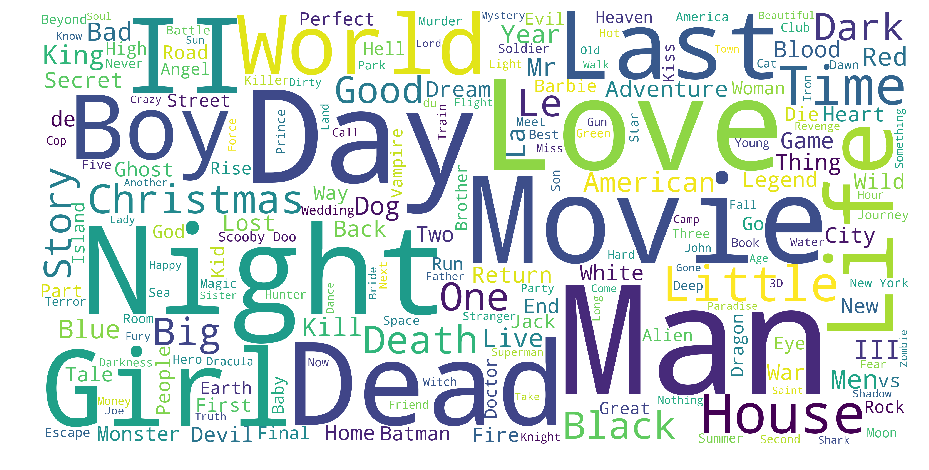

In [35]:
title_wd = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title)
plt.figure(figsize=(16,8))
plt.imshow(title_wd)
plt.axis('off')
plt.show()

> ### Question 1 Findings
>**Some of the most common words used in movie titles include (sorted alphabetically):** Day, Dead, Girl, I, Last, Love, Man, Movie, and Night

### Question 2: What are the top five highest grossing movies with highest movie rating? 
>**NOTE:** I will only be looking at the following years: 2010-2015.

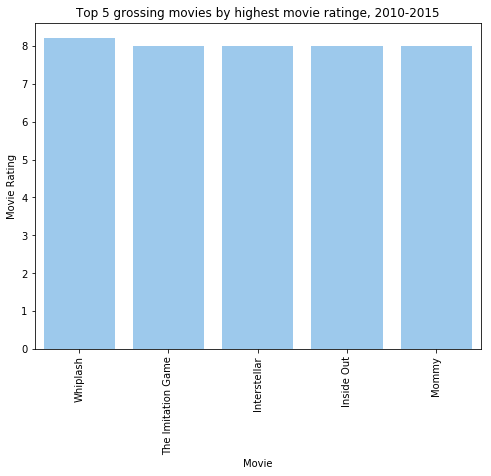

In [36]:
df_year = df_money.query('release_year >=2010')

#create df_copy and drop any missing info
df_copy = df_year.copy().dropna()

#Get top grossing movies
top_gross_movies = df_copy.sort_values(by =['movie_gross_adj'], ascending = False)

movie_vote_counts = top_gross_movies.groupby('original_title')['vote_average'].mean()
movie_vote_indx = movie_vote_counts.sort_values(ascending=False)[:5].index
movie_vote_values = movie_vote_counts.sort_values(ascending=False)[:5].values

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = movie_vote_indx,
            y = movie_vote_values,
            color='#90caf9',
            ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Top 5 grossing movies by highest movie ratinge, 2010-2015')
plt.ylabel('Movie Rating')
plt.xlabel('Movie')
del fig,ax,ticks

> ### Question 2 Findings
>**The top five movies by highest movie rating are:** Whiplash, The Imitation Game, Interstellar, Inside Out, Mommy

### Question 3: What are the top five movies with highest gross earning? 
>**NOTE:** I will only be looking at the following years: 2010-2015.

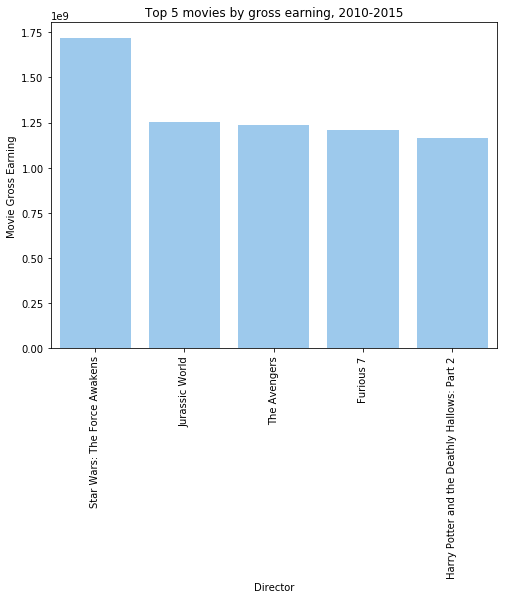

In [37]:
#Top 5 movies with highest gross earning
df_year = df_money.query('release_year >=2010')

#Movie vs movie adjusted gross
df_copy = df_year.copy().dropna()
movie_gross_counts = df_copy.groupby(df_copy['original_title'])['movie_gross_adj'].mean()
movie_gross_indx = movie_gross_counts.sort_values(ascending=False)[:5].index
movie_gross_values = movie_gross_counts.sort_values(ascending=False)[:5].values

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = movie_gross_indx,
            y = movie_gross_values,
            color='#90caf9',
            ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Top 5 movies by gross earning, 2010-2015')
plt.ylabel('Movie Gross Earning')
plt.xlabel('Director')
del fig,ax,ticks

> ### Question 3 Findings
>**The top five movies with highest gross earnings are:**  Star Wars: The Force Awakens, Jurassic World, The Avengers, Furious 7, and Harry Potter and the Deathly Hallows: Part 2

### Question 4: What are the directors with the highest grossing films by year? 
>**NOTE:** I will only be looking at the following years: 2010-2015.

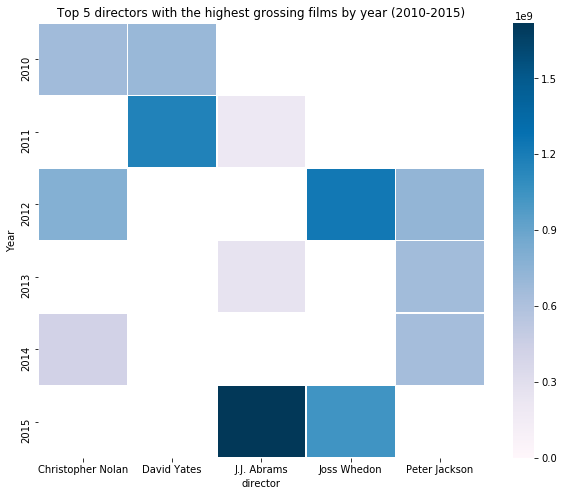

In [38]:
#Director vs year and diff_gross
# use query to create a group of years between 2010 and 2015
df_year = df_money.query('release_year >=2010')

# remove SettingWithCopyWarning 
pd.options.mode.chained_assignment = None  

df_copy = df_year.copy().dropna()
director_budge = df_copy.groupby(df_copy['director'])['movie_gross_adj'].sum()
director_budge_indx = director_budge.sort_values(ascending=False)[:5].index
director_budge_pivot = pd.pivot_table(data = df_copy[df_year['director'].isin(director_budge_indx)],
                                      index=['release_year'],
                                      columns=['director'],
                                      values=['movie_gross_adj'],
                                      aggfunc='sum')
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(director_budge_pivot['movie_gross_adj'],vmin=0,annot=False,linewidth=.5,ax=ax,cmap='PuBu')
plt.title('Top 5 directors with the highest grossing films by year (2010-2015)')
plt.ylabel('Year');

> ### Question 4 Findings
>**The directors with the highest grossing films by year are:**  
- 2010:Christopher Nolan, David Yates
- 2011: David Yates, JJ. Abrams
- 2012: Christopher Nolan, Joss Whedon, Peter Jackson
- 2013: JJ. Abrams, Peter Jackson
- 2014: Christopher Nolan, Peter Jackson
- 2015: JJ. Abrams, Joss Whedon

---
<a id='conclusions'></a>
## IV. CONCLUSIONS

**Findings:** After analyzing the TMDb dataset, I determined the following conclusions:
- **Some of the most common words used in movie titles include (sorted alphabetically):** Day, Dead, Girl, I, Last, Love, Man, Movie, and Night 
- **The top five movies by highest movie rating are:** Whiplash, The Imitation Game, Interstellar, Inside Out, Mommy
- **The top five movies with highest gross earnings are:**  Star Wars: The Force Awakens, Jurassic World, The Avengers, Furious 7, and Harry Potter and the Deathly Hallows: Part 2
- **The directors with the highest grossing films by year are:**  
> - 2010:Christopher Nolan, David Yates
> - 2011: David Yates, JJ. Abrams
> - 2012: Christopher Nolan, Joss Whedon, Peter Jackson
> - 2013: JJ. Abrams, Peter Jackson
> - 2014: Christopher Nolan, Peter Jackson
> - 2015: JJ. Abrams, Joss Whedon

**Limitations**: The analysis was done under the assumption that the budget and revenue were in US dollars. Also, since the budget and revenue colums were missing data I was only able to use 3,849 out of the 10,865 rows in the dataset.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0